# Project 1: Work Environments/Locations and its Effects on Mental Health and Lifestyles

## Group 1: Jennifer Foster, Marie Louise Iraba, Indya Jones, Kevin Khov, Geniya Merriweather, William Payne
---

**Introduction:** With the events of the global COVID-19 pandemic drastically altering work environments and some of our group's experiences working remote/hybrid, our group chose to analyze a dataset that listed numerous different metrics regarding mental health and lifestyle aspects compared to work location (remote, hybrid, onsite). We wanted to see if there is any substantial correlation between the presence of mental health/lifestyle issues between those that work strictly remotely and those that work in-person. Some of the other questions that we were interesting in exploring further were if and how other factors such as gender, work industry and region potentially affected mental health and lifestyles.

**Hypothesis:** Remote work contributes to present mental health and lifestyle issues compared to onsite/hybrid work. There is a correlation between working remotely and having mental health/lifestyle problems.

**Questions:**
- Does work location have an impact on mental health and lifestyle problems?
- Is there a difference in mental health conditions across different genders by work location?
- Does work industry, along with work location, have an impact on mental health problems?
- Does work region have an impact on mental health problems?
- How does work location affect sleep and work productivity?
- How does region and work location affect social isolation ratings?

**Data Overview:** The dataset that was used in this analysis was found in the Kaggle database. A total of 5000 employees are included in that dataset and were polled on various metrics. Some of the metrics used in this analysis include work location, mental health condition, gender, work industry, work region, sleep quality, work productivity, and social isolation ratings.

## Data Setup and Cleaning Process:

In [149]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statistics
import seaborn as sns

%matplotlib inline
plt.ioff()

In [150]:
# Define the path to the CSV file
mental_health_data = "Impact_of_Remote_Work_on_Mental_Health.csv"

# Load the CSV file into a DataFrame
mental_health_data_df = pd.read_csv(mental_health_data)

# Display sample data
mental_health_data_df.head()

Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2                          11                         5       Medium   
3                           8                         4         High   
4                          12                         2         High   

  Mental_Health_Condition Access_to_Mental_Health_Resources  \
0              Depression                                No   
1                 Anxiety                                No   
2                 Anxiety                                No   
3              Depression                               Yes   
4                     NaN                               Yes   

  Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0            Decrease                        1                   Unsatisfied   
1            Increase                        3                     Satisfied   
2           No Change                        4                   Unsatisfied   
3            Increase                        3                   Unsatisfied   
4            Decrease                        3                   Unsatisfied   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality  \
0                                1            Weekly          Good   
1                                2            Weekly          Good   
2                                5               NaN          Poor   
3                                3               NaN          Poor   
4                                3            Weekly       Average   

          Region  
0         Europe  
1           Asia  
2  North America  
3         Europe  
4  North America

In [151]:
# Fill in all "None" values with values
# In the original CSV file, any cell with a "None" was treated as an NaN value. Thus we had to make sure we correctly valued each of these so that they
# could be included in our analysis.
clean_data = mental_health_data_df.fillna({"Mental_Health_Condition": 'No mental health conditions', "Physical_Activity": 'No Physical Activity' })
clean_data

Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote                     52   
2                      22        Hybrid                     46   
3                      20        Onsite                     32   
4                      32        Onsite                     35   
...                   ...           ...                    ...   
4995                    4        Onsite                     24   
4996                   27        Onsite                     48   
4997                   21        Hybrid                     34   
4998                   26        Remote                     58   
4999                   30        Onsite                     20   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                              7                         2       Medium   
1                              4                         1       Medium   
2                             11                         5       Medium   
3                              8                         4         High   
4                             12                         2         High   
...                          ...                       ...          ...   
4995                           2                         5         High   
4996                          15                         1          Low   
4997                           1                         4         High   
4998                           0                         5          Low   
4999                          15                         1          Low   

          Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                      Depression                                No   
1                         Anxiety                                No   
2                         Anxiety                                No   
3                      Depression                               Yes   
4     No mental health conditions                               Yes   
...                           ...                               ...   
4995                      Burnout                               Yes   
4996                   Depression                               Yes   
4997                      Burnout                                No   
4998  No mental health conditions                               Yes   
4999                   Depression                               Yes   

     Productivity_Change  Social_Isolation_Rating  \
0               Decrease                        1   
1               Increase                        3   
2              No Change                        4   
3               Increase                        3   
4               Decrease                        3   
...                  ...                      ...   
4995            Decrease                        4   
4996            Decrease                        1   
4997            Increase                        3   
4998            Increase                        3   
4999           No Change                        3   

    

## Section 1: Mental Health Conditions vs. Work Location
### Does work location have an impact on mental health and lifestyle problems?

In [152]:
# Group out DataFrame by Work Location (remote/hybrid/onsite) and Mental Health Condition
grouped_data = clean_data.groupby('Work_Location')['Mental_Health_Condition'].value_counts()
grouped_data

Work_Location  Mental_Health_Condition    
Hybrid         Anxiety                        428
               Depression                     421
               Burnout                        400
               No mental health conditions    400
Onsite         Burnout                        442
               Depression                     412
               Anxiety                        407
               No mental health conditions    376
Remote         Anxiety                        443
               Burnout                        438
               No mental health conditions    420
               Depression                     413
Name: count, dtype: int64

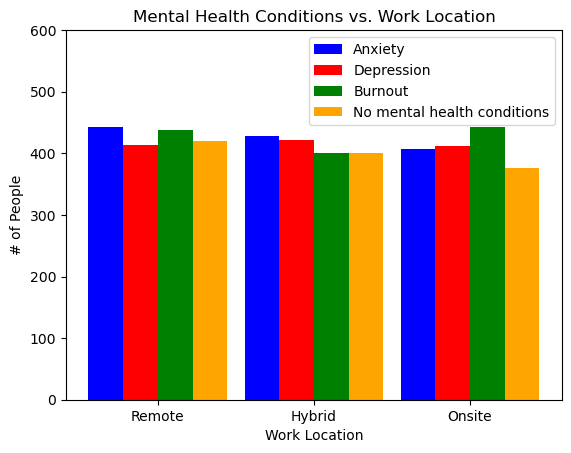

In [153]:
# Create a bar chart depicting numnber of people with a mental health condition based on work location
categories = ['Remote', 'Hybrid', 'Onsite']
anxiety = [443, 428, 407]
depression = [413, 421, 412]
burnout = [438, 400, 442]
no_mental_conditions = [420, 400, 376]

n = len(categories)

width = 0.25
gap = 0.5
index = np.arange(n) * (width*(4+gap)) # creates a gap between each group

fig, ax = plt.subplots()
bar1 = ax.bar(index - (1.5*width), anxiety, width, label='Anxiety', color='blue')
bar2 = ax.bar(index - (0.5*width), depression, width, label='Depression', color='red')
bar3 = ax.bar(index + (0.5*width), burnout, width, label='Burnout', color='green')
bar4 = ax.bar(index + (1.5*width), no_mental_conditions, width, label='No mental health conditions', color='orange')

ax.set_xlabel('Work Location')
ax.set_ylabel('# of People')
ax.set_title('Mental Health Conditions vs. Work Location')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.set_ylim(0, 600)
ax.legend()

plt.show()

In [154]:
# Statistical analysis for chart above
mental_stats_remote = [443, 413, 438, 420]
mental_stats_hybrid = [428, 421, 400, 400]
mental_stats_onsite = [407, 412, 442, 376]

f_stat, p_value = stats.f_oneway(mental_stats_remote, mental_stats_hybrid, mental_stats_onsite)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.1263672159836664, P-value: 0.3659569334052598


**Statistical Analysis:** Since the p-value of this analysis is > 0.05 (0.366), we can conclude that there is no statistical differences between instances of mental health issues between working remote, hybrid or onsite.

In [155]:
# Group out DataFrame by Work Location (remote/hybrid/onsite) and stress level
group_data2 = clean_data.groupby('Work_Location')['Stress_Level'].value_counts()
group_data2

Work_Location  Stress_Level
Hybrid         High            561
               Medium          545
               Low             543
Onsite         Low             555
               Medium          547
               High            535
Remote         High            590
               Medium          577
               Low             547
Name: count, dtype: int64

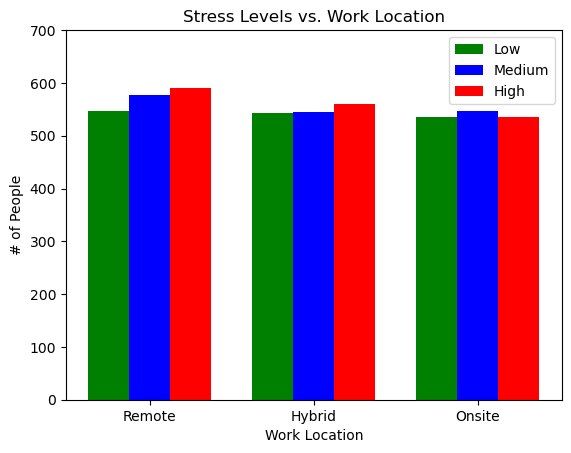

In [156]:
# Create a bar chart for stress level and work location
categories2 = ['Remote', 'Hybrid', 'Onsite']
low = [547, 543, 535]
medium = [577, 545, 547]
high = [590, 561, 535]

n = len(categories2)
width = 0.25
index = np.arange(n)

fig, ax = plt.subplots()
bar1 = ax.bar(index - width, low, width, label='Low', color='green')
bar2 = ax.bar(index, medium, width, label='Medium', color='blue')
bar3 = ax.bar(index + width, high, width, label='High', color='red')

ax.set_xlabel('Work Location')
ax.set_ylabel('# of People')
ax.set_title('Stress Levels vs. Work Location')
ax.set_xticks(index)
ax.set_xticklabels(categories2)
ax.set_ylim(0, 700)
ax.legend()

plt.show()

In [157]:
# Statistical analysis for chart above
stress_remote = [547, 577, 590]
stress_hybrid = [543, 545, 561]
stress_onsite = [535, 547, 535]

f_stat, p_value = stats.f_oneway(stress_remote, stress_hybrid, stress_onsite)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 3.867546174142481, P-value: 0.0833602483603365


**Statistical Analysis:** Since the p-value of this analysis is > 0.05 (0.08), we can conclude that there is no statistical differences between stress levels between working remote, hybrid or onsite, although the p-value is very close.

In [158]:
# Group out DataFrame by Work Location (remote/hybrid/onsite) and productivity change
group_data3 = clean_data.groupby('Work_Location')['Productivity_Change'].value_counts()
group_data3

Work_Location  Productivity_Change
Hybrid         Decrease               591
               No Change              544
               Increase               514
Onsite         No Change              565
               Decrease               558
               Increase               514
Remote         Decrease               588
               No Change              568
               Increase               558
Name: count, dtype: int64

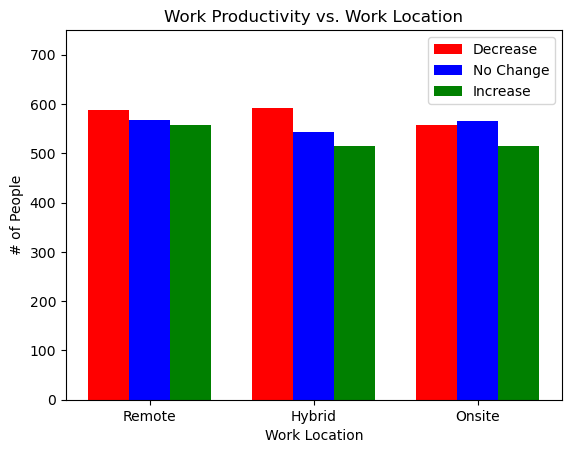

In [159]:
# Create a bar chart for work location and productivity change
categories3 = ['Remote', 'Hybrid', 'Onsite']
decrease = [588, 591, 558]
no_change = [568, 544, 565]
increase = [558, 514, 514]

n = len(categories3)
width = 0.25
index = np.arange(n)

fig, ax = plt.subplots()
bar1 = ax.bar(index - width, decrease, width, label='Decrease', color='red')
bar2 = ax.bar(index, no_change, width, label='No Change', color='blue')
bar3 = ax.bar(index + width, increase, width, label='Increase', color='green')

ax.set_xlabel('Work Location')
ax.set_ylabel('# of People')
ax.set_title('Work Productivity vs. Work Location')
ax.set_xticks(index)
ax.set_xticklabels(categories3)
ax.set_ylim(0, 750)
ax.legend()

plt.show()

In [160]:
# Statistical analysis for chart above
productivity_remote = [588, 568, 558]
productivity_hybrid = [591, 544, 514]
productivity_onsite = [558, 514, 514]

f_stat, p_value = stats.f_oneway(productivity_remote, productivity_hybrid, productivity_onsite)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.717540181691125, P-value: 0.25716800764870257


**Statistical Analysis:** Since the p-value of this analysis is > 0.05 (0.257), we can conclude that there is no statistical differences between increases or decreases of work productivity between working remote, hybrid or onsite.

In [161]:
# Group out DataFrame by Work Location (remote/hybrid/onsite) and access to mental health resources
group_data4 = clean_data.groupby('Work_Location')['Access_to_Mental_Health_Resources'].value_counts()
group_data4

Work_Location  Access_to_Mental_Health_Resources
Hybrid         No                                   837
               Yes                                  812
Onsite         No                                   820
               Yes                                  817
Remote         No                                   896
               Yes                                  818
Name: count, dtype: int64

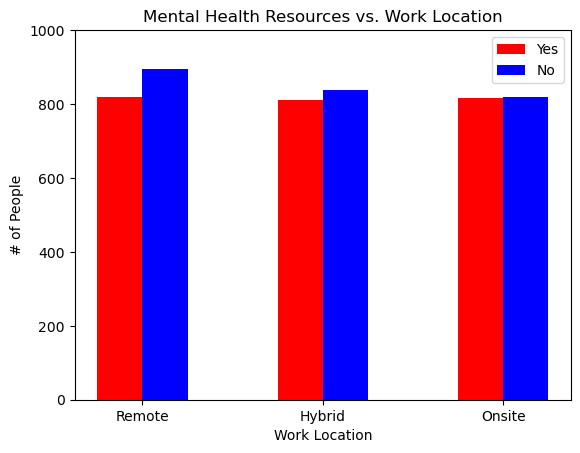

In [162]:
# Create a bar chart for work location and access to mental health resources
categories4 = ['Remote', 'Hybrid', 'Onsite']
yes = [818, 812, 817]
no = [896, 837, 820]

n = len(categories4)
width = 0.25
index = np.arange(n)

fig, ax = plt.subplots()
bar1 = ax.bar(index - width/2, yes, width, label='Yes', color='red')
bar2 = ax.bar(index + width/2, no, width, label='No', color='blue')

ax.set_xlabel('Work Location')
ax.set_ylabel('# of People')
ax.set_title('Mental Health Resources vs. Work Location')
ax.set_xticks(index)
ax.set_xticklabels(categories4)
ax.set_ylim(0,1000)
ax.legend()

plt.show()

In [163]:
# Statistical analysis for chart above
access_remote = [818, 896]
access_hybrid = [812, 837]
access_onsite = [817, 820]

f_stat, p_value = stats.f_oneway(access_remote, access_hybrid, access_onsite)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 0.7664483477225362, P-value: 0.5384162385358537


**Statistical Analysis:** Since the p-value of this analysis is > 0.05 (0.538), we can conclude that there is no statistical differences between access to mental health resources between working remote, hybrid or onsite.

## Section 2: Mental Health Conditions and Gender vs. Work Location
### Is there a difference in mental health conditions across different genders by work location?

In [164]:
# Clean data for this section
clean_data_gender = mental_health_data_df.fillna({"Mental_Health_Condition": 'No mental health conditions', "Physical_Activity": 'No Physical Activity' })
clean_data_gender

Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote                     52   
2                      22        Hybrid                     46   
3                      20        Onsite                     32   
4                      32        Onsite                     35   
...                   ...           ...                    ...   
4995                    4        Onsite                     24   
4996                   27        Onsite                     48   
4997                   21        Hybrid                     34   
4998                   26        Remote                     58   
4999                   30        Onsite                     20   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                              7                         2       Medium   
1                              4                         1       Medium   
2                             11                         5       Medium   
3                              8                         4         High   
4                             12                         2         High   
...                          ...                       ...          ...   
4995                           2                         5         High   
4996                          15                         1          Low   
4997                           1                         4         High   
4998                           0                         5          Low   
4999                          15                         1          Low   

          Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                      Depression                                No   
1                         Anxiety                                No   
2                         Anxiety                                No   
3                      Depression                               Yes   
4     No mental health conditions                               Yes   
...                           ...                               ...   
4995                      Burnout                               Yes   
4996                   Depression                               Yes   
4997                      Burnout                                No   
4998  No mental health conditions                               Yes   
4999                   Depression                               Yes   

     Productivity_Change  Social_Isolation_Rating  \
0               Decrease                        1   
1               Increase                        3   
2              No Change                        4   
3               Increase                        3   
4               Decrease                        3   
...                  ...                      ...   
4995            Decrease                        4   
4996            Decrease                        1   
4997            Increase                        3   
4998            Increase                        3   
4999           No Change                        3   

    

In [165]:
# Create an initial dataframe that includes gender, work location and mental health condition
gender_wp = clean_data_gender[["Gender", "Work_Location", "Mental_Health_Condition"]]

gender_wp

Gender Work_Location      Mental_Health_Condition
0     Non-binary        Hybrid                   Depression
1         Female        Remote                      Anxiety
2     Non-binary        Hybrid                      Anxiety
3           Male        Onsite                   Depression
4           Male        Onsite  No mental health conditions
...          ...           ...                          ...
4995        Male        Onsite                      Burnout
4996      Female        Onsite                   Depression
4997      Female        Hybrid                      Burnout
4998      Female        Remote  No mental health conditions
4999        Male        Onsite                   Depression

[5000 rows x 3 columns]

In [166]:
# New dataframe for counts of gender data, grouped by work location and gender
gender_data = clean_data_gender.groupby(['Work_Location', 'Gender'])['Mental_Health_Condition'].value_counts()

gender_data

Work_Location  Gender             Mental_Health_Condition    
Hybrid         Female             Depression                     120
                                  Burnout                        112
                                  No mental health conditions    105
                                  Anxiety                        104
               Male               Depression                     102
                                  Anxiety                        100
                                  Burnout                         99
                                  No mental health conditions     86
               Non-binary         Anxiety                        116
                                  No mental health conditions    105
                                  Depression                     103
                                  Burnout                         89
               Prefer not to say  Anxiety                        108
                                  No ment

In [167]:
# Combine the mental health conditions to compare to those who have none
clean_data_gender['Mental_Health_Condition'] = clean_data_gender['Mental_Health_Condition'].replace({'Depression': 'Depression/Anxiety/Burnout', 'Anxiety':'Depression/Anxiety/Burnout', 'Burnout': 'Depression/Anxiety/Burnout'})

combined_data = clean_data_gender.groupby(['Work_Location', 'Gender'])['Mental_Health_Condition'].value_counts()

combined_data

Work_Location  Gender             Mental_Health_Condition    
Hybrid         Female             Depression/Anxiety/Burnout     336
                                  No mental health conditions    105
               Male               Depression/Anxiety/Burnout     301
                                  No mental health conditions     86
               Non-binary         Depression/Anxiety/Burnout     308
                                  No mental health conditions    105
               Prefer not to say  Depression/Anxiety/Burnout     304
                                  No mental health conditions    104
Onsite         Female             Depression/Anxiety/Burnout     280
                                  No mental health conditions    100
               Male               Depression/Anxiety/Burnout     365
                                  No mental health conditions     87
               Non-binary         Depression/Anxiety/Burnout     304
                                  No ment

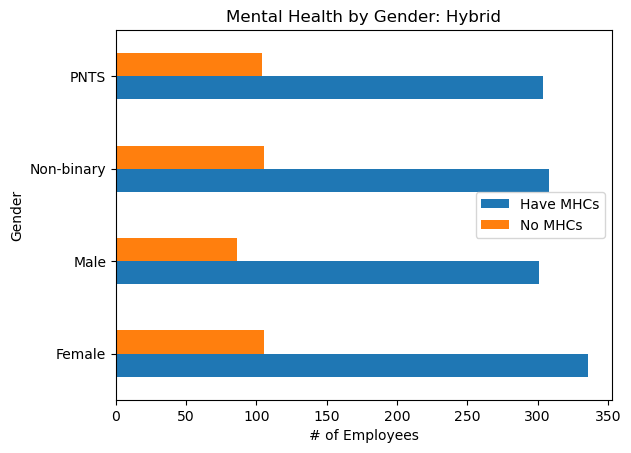

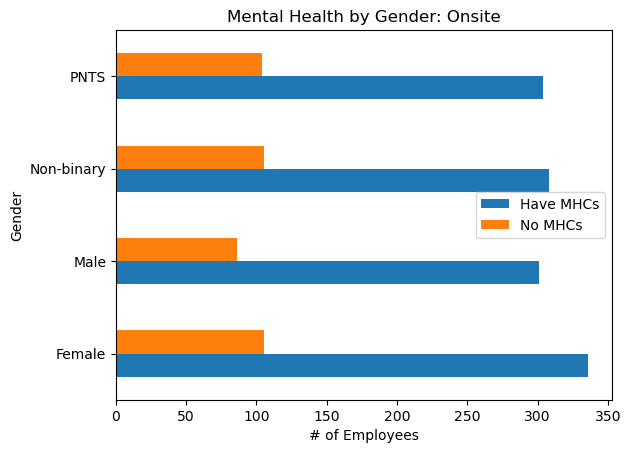

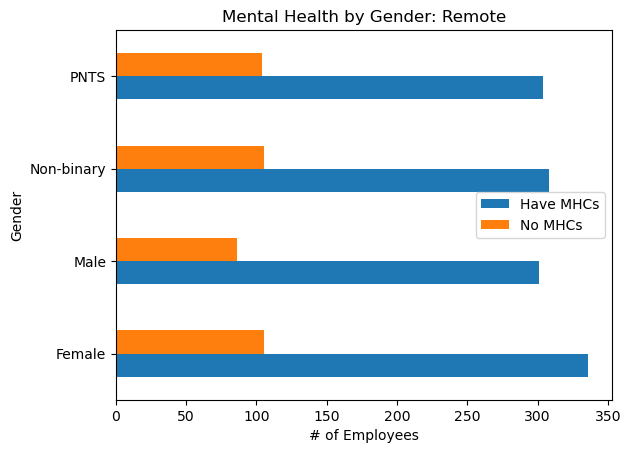

In [168]:
# Chart/table for counts of mental health conditions based on work location and gender
# Hybrid
data_hybrid = {'Gender': ['Female', 'Male', 'Non-binary', 'PNTS'],
        'Have MHCs': [336, 301, 308, 304],
        'No MHCs': [105, 86, 105, 104]}
df = pd.DataFrame(data_hybrid)

df.plot(x='Gender', y=['Have MHCs', 'No MHCs'], kind='barh')
plt.title('Mental Health by Gender: Hybrid')
plt.xlabel('# of Employees')
plt.ylabel('Gender')

# Onsite
data_onsite = {'Gender': ['Female', 'Male', 'Non-binary', 'PNTS'],
        'Have MHCs': [280, 365, 304, 312],
        'No MHCs': [100, 87, 96, 93]}
df_2 = pd.DataFrame(data_onsite)

df.plot(x='Gender', y=['Have MHCs', 'No MHCs'], kind='barh')
plt.title('Mental Health by Gender: Onsite')
plt.xlabel('# of Employees')
plt.ylabel('Gender')

# Remote
data_remote = {'Gender': ['Female', 'Male', 'Non-binary', 'PNTS'],
        'Have MHCs': [343, 328, 305, 318],
        'No MHCs': [110, 103, 96, 111]}
df_3 = pd.DataFrame(data_remote)

df.plot(x='Gender', y=['Have MHCs', 'No MHCs'], kind='barh')
plt.title('Mental Health by Gender: Remote')
plt.xlabel('# of Employees')
plt.ylabel('Gender')

plt.show()

In [169]:
# Summary Statistics
# Table for counts of mental health conditions based on work location and gender
clean_data_gender.to_csv('clean_data_gender.csv')
gender_data_frame = pd.read_csv('clean_data_gender.csv')
#Create the Crosstab (Contingency Table)
crosstab = pd.crosstab(
    index=[gender_data_frame['Work_Location'], gender_data_frame['Gender']],
    columns=gender_data_frame['Mental_Health_Condition'],
    values=gender_data_frame['Employee_ID'],
    aggfunc='size', normalize='index')*100
display(crosstab)

Mental_Health_Condition          Depression/Anxiety/Burnout  \
Work_Location Gender                                          
Hybrid        Female                              76.190476   
              Male                                77.777778   
              Non-binary                          74.576271   
              Prefer not to say                   74.509804   
Onsite        Female                              73.684211   
              Male                                80.752212   
              Non-binary                          76.000000   
              Prefer not to say                   77.037037   
Remote        Female                              75.717439   
              Male                                76.102088   
              Non-binary                          76.059850   
              Prefer not to say                   74.125874   

Mental_Health_Condition          No mental health conditions  
Work_Location Gender                                          
Hybrid        Female                               23.809524  
              Male                                 22.222222  
              Non-binary                           25.423729  
              Prefer not to say                    25.490196  
Onsite        Female                               26.315789  
              Male                                 19.247788  
              Non-binary                           24.000000  
              Prefer not to say                    22.962963  
Remote        Female                               24.282561  
              Male                                 23.897912  
              Non-binary                           23.940150  
              Prefer not to say                    25.874126

**Analysis:** According to our analysis, over 70% of people of various genders experience some form of mental health conditions, with 80.75% of males who work onsite having the highest report of mental health conditions and 73.68% of females who work onsite being the lowest (burnout being the most reported MH between the two). However, generally speaking, there does not appear to any existing tends of mental health conditionals across genders by work location.

## Section 3: Mental Health Conditions and Industry vs. Work Location
### Does work industry, along with work location, have an impact on mental health problems?

Mental_Health_Condition      Anxiety  Burnout  Depression  \
Industry      Work_Location                                 
Consulting    Hybrid              51       58          57   
              Onsite              55       59          64   
              Remote              72       49          51   
Education     Hybrid              61       55          51   
              Onsite              56       64          62   
              Remote              59       55          58   
Finance       Hybrid              69       70          63   
              Onsite              61       56          69   
              Remote              56       76          47   
Healthcare    Hybrid              60       55          73   
              Onsite              53       63          61   
              Remote              47       73          67   
IT            Hybrid              69       55          63   
              Onsite              69       76          53   
              Remote              67       61          66   
Manufacturing Hybrid              59       56          50   
              Onsite              58       50          39   
              Remote              64       69          61   
Retail        Hybrid              59       51          64   
              Onsite              55       74          64   
              Remote              78       55          63   

Mental_Health_Condition      No mental health conditions  
Industry      Work_Location                               
Consulting    Hybrid                                  58  
              Onsite                                  53  
              Remote                                  53  
Education     Hybrid                                  45  
              Onsite                                  58  
              Remote                                  66  
Finance       Hybrid                                  57  
              Onsite                                  45  
              Remote                                  78  
Healthcare    Hybrid                                  59  
              Onsite                                  52  
              Remote                                  65  
IT            Hybrid                                  65  
              Onsite                                  57  
              Remote                                  45  
Manufacturing Hybrid                                  58  
              Onsite                                  55  
              Remote                                  64  
Retail        Hybrid                                  58  
              Onsite                                  56  
              Remote                                  49

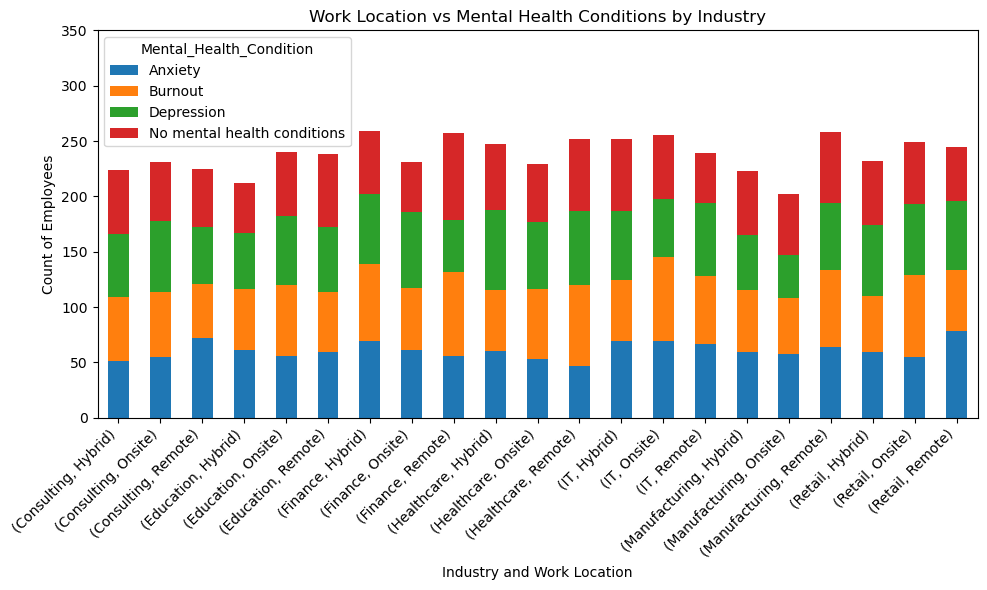

In [170]:
# Chart/table for counts of mental health conditions based on work location and industry
clean_data.to_csv('clean_data.csv')
industry_df = pd.read_csv('clean_data.csv')
#Create the Crosstab (Contingency Table)
industry_crosstab = pd.crosstab(
    index=[industry_df['Industry'], industry_df['Work_Location']],  # Group by Industry and Work Location
    columns=industry_df['Mental_Health_Condition'],  # Columns are the Mental Health Conditions
    values=industry_df['Employee_ID'],  # Count based on Work_Location
    aggfunc='size'  # Fill missing values with 0
)
# Display the crosstab
display(industry_crosstab)
# Plot the crosstab as a stacked bar chart
industry_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
# Customize the chart
plt.title('Work Location vs Mental Health Conditions by Industry')
plt.xlabel('Industry and Work Location')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45, ha="right")
plt.ylim(0,350)
plt.tight_layout()
plt.show()

**Analysis:**

- Healthcare and IT industries show higher counts of anxiety and burnout, particularly in hybrid and onsite setups.- Retail has a notable share of employees with no mental health conditions compared to other industries.- In Education and Finance, remote workers report fewer mental health conditions than onsite or hybrid workers.
- Hybrid workers generally show the highest counts across all mental health categories, possibly reflecting challenges in balancing in-person and remote responsibilities.
- Remote workers, across most industries, appear to report fewer mental health issues compared to hybrid or onsite workers.

Overall, we can see that there are some industries that have a higher number of people with mental health issues, but there is not a consistent trend of across certain industries.

In [171]:
empl_vs_region_vs_stress = clean_data.groupby(['Region','Stress_Level'])['Employee_ID'].count().reset_index().sort_values('Employee_ID')
empl_vs_region_vs_stress

Region Stress_Level  Employee_ID
3            Asia         High          252
11  North America       Medium          255
9   North America         High          256
7          Europe          Low          261
16  South America          Low          264
10  North America          Low          266
2          Africa       Medium          268
17  South America       Medium          275
8          Europe       Medium          281
4            Asia          Low          281
1          Africa          Low          282
12        Oceania         High          282
15  South America         High          288
13        Oceania          Low          291
14        Oceania       Medium          294
5            Asia       Medium          296
6          Europe         High          298
0          Africa         High          310

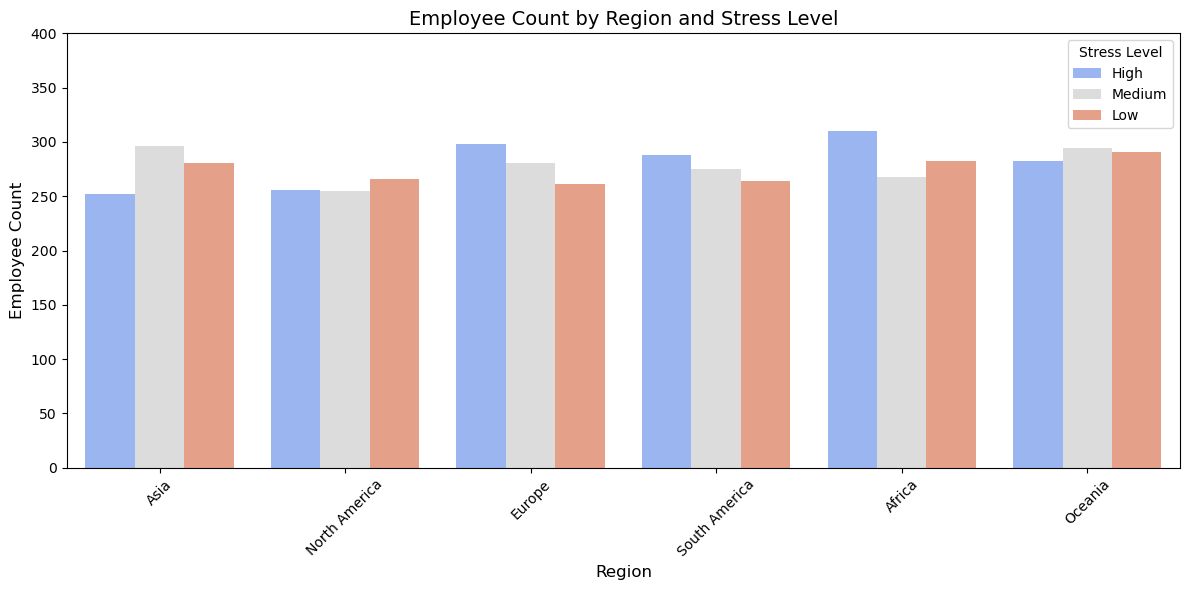

In [172]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Region',
    y='Employee_ID',
    hue='Stress_Level',
    data=empl_vs_region_vs_stress,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Employee Count by Region and Stress Level', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.legend(title='Stress Level', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylim(0,400)

# Display the chart
plt.tight_layout()
plt.show()

**Analysis:** 

- Across regions, high stress levels tend to dominate or closely match the counts of other stress levels.
- Asia, employees with Medium and low-stress levels are higher than those with high-stress levels.
- Africa and Europe seem to have higher numbers of employees with high-stress levels than other .regions. To reduce the proportion of high-stress employees, they may need stress management interventions to improve workplace condition.
- 
Oceania shows relatively equal distribution across stress levels (High, Medium, and Low), which may indicate more balanced workplace conditions.

## Section 4: Mental Health Conditions and Work Region
### Does work region have an impact on mental health problems?

In [173]:
# Create a pivot table by region
pivot = clean_data.pivot_table(columns='Mental_Health_Condition', index='Region', values='Employee_ID', aggfunc='count')
pivot

Mental_Health_Condition  Anxiety  Burnout  Depression  \
Region                                                  
Africa                       217      217         212   
Asia                         228      226         197   
Europe                       212      221         206   
North America                196      203         189   
Oceania                      219      218         215   
South America                206      195         227   

Mental_Health_Condition  No mental health conditions  
Region                                                
Africa                                           214  
Asia                                             178  
Europe                                           201  
North America                                    189  
Oceania                                          215  
South America                                    199

In [174]:
# Sort out pivot table with sums of totals by region
pivot.sum(axis=1)

Region
Africa           860
Asia             829
Europe           840
North America    777
Oceania          867
South America    827
dtype: int64

In [175]:
# Creating lists and calculation percentages
AnxietyList = [217, 228, 212, 196, 219, 206]
BurnoutList = [217, 226, 221, 203, 218, 195]
DepressionList = [212, 197, 206, 189, 215, 227]
NoneList = [214, 178, 201, 189, 215, 199]
TotalList = [860, 829, 840, 777, 867, 827]

Anxiety = (a/b for a,b in zip(AnxietyList, TotalList))
Burnout = (c/d for c,d in zip(BurnoutList, TotalList))
Depression = (e/f for e,f in zip(DepressionList, TotalList))
NoneReported = (g/h for g,h in zip(NoneList, TotalList))

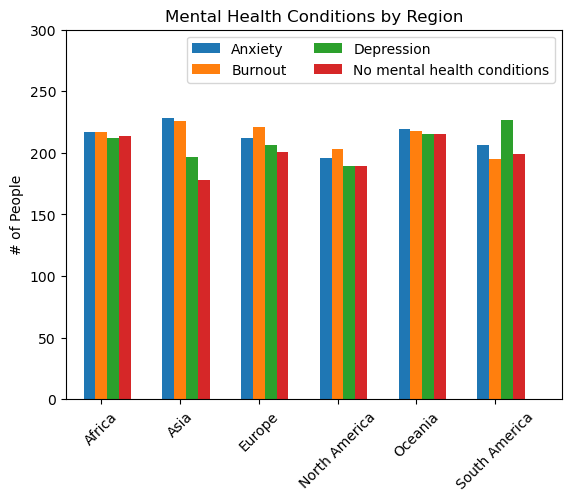

In [176]:
# Chart/table for counts of mental health conditions based on work location and region
xlist = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
ylist = {
    'Anxiety': (217, 228, 212, 196, 219, 206),
    'Burnout': (217, 226, 221, 203, 218, 195),
    'Depression': (212, 197, 206, 189, 215, 227),
    'No mental health conditions': (214, 178, 201, 189, 215, 199)
}

x = np.arange(len(xlist))
width = 0.15
multiplier = 0
fig, ax = plt.subplots()

for attribute, measurement in ylist.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('# of People')
ax.set_title('Mental Health Conditions by Region')
ax.set_xticks(x+width, xlist, rotation=45)
ax.legend(loc='upper right', ncols=2)

ax.set_ylim(0,300)
ax.set_xlim(-.3,6)

plt.show()

**Analysis:** Across all the Regions, we see a large amount of respondents reporting instances of Depression, Anxiety, and Burnout. When initially looking at the bar chart, there are a couple of standouts: Asia with higher proportion reporting Anxiety and Burnout with fewer reporting no mental health conditions, South America reporting higher amounts of Depression.

In [177]:
# Table summary of percentages by region
type_summary = pd.DataFrame({"Region":xlist, "% with Depression":Depression, "% with Anxiety":Anxiety,"% with Burnout":Burnout, "% with No Mental Illness Report":NoneReported})
type_summary

Region  % with Depression  % with Anxiety  % with Burnout  \
0         Africa           0.246512        0.252326        0.252326   
1           Asia           0.237636        0.275030        0.272618   
2         Europe           0.245238        0.252381        0.263095   
3  North America           0.243243        0.252252        0.261261   
4        Oceania           0.247982        0.252595        0.251442   
5  South America           0.274486        0.249093        0.235792   

   % with No Mental Illness Report  
0                         0.248837  
1                         0.214717  
2                         0.239286  
3                         0.243243  
4                         0.247982  
5                         0.240629

**Analysis:** We wanted to drill down deeper into this. Because each region has a different number of respondents, we calculated the proportion of respondents that indicated each potential answer so we could compare the breakdown of each region. Similar to the graph, Asia has 27.5% reporting Anxiety and 27.3% reporting Burnout. South America has the highest depression reporting at 27.4%.

In [178]:
# Overall averages of mental health conditions
type_summary.describe()

% with Depression  % with Anxiety  % with Burnout  \
count           6.000000        6.000000        6.000000   
mean            0.249183        0.255613        0.256089   
std             0.012907        0.009604        0.012623   
min             0.237636        0.249093        0.235792   
25%             0.243742        0.252271        0.251663   
50%             0.245875        0.252353        0.256793   
75%             0.247614        0.252542        0.262637   
max             0.274486        0.275030        0.272618   

       % with No Mental Illness Report  
count                         6.000000  
mean                          0.239116  
std                           0.012552  
min                           0.214717  
25%                           0.239621  
50%                           0.241936  
75%                           0.246797  
max                           0.248837

**Analysis:** We used describe to find the mean reporting for each at 24.9%, 25.5%, 25.6% which puts the max about 2% over the mean for each instance. These are all relatively similar to each other with the min and max only being separated by 2.6 - 3.7%. Region may have some impact on mental health but its likely minimal.

## Section 5: Work Location on Sleep and Work Productivity
### How does work location affect sleep and work productivity?

In [179]:
# Filtered Data for Productivity Change and Work Location
productivity_bar_df = mental_health_data_df[(mental_health_data_df["Work_Location"] != "Hybrid") & (mental_health_data_df["Productivity_Change"])]

In [180]:
# Group out DataFrame by Work Location (remote/onsite) and Productivity Change
productivity_grouped_data = productivity_bar_df.groupby("Work_Location")["Productivity_Change"].value_counts().unstack(fill_value=0)
productivity_grouped_data

Productivity_Change  Decrease  Increase  No Change
Work_Location                                     
Onsite                    558       514        565
Remote                    588       558        568

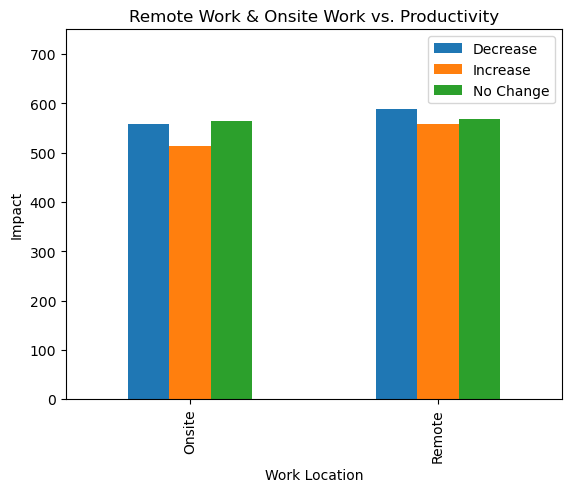

In [181]:
# Bar chart showing the impact of work location on productivity
productivity_grouped_data.plot(kind = 'bar')
plt.title('Remote Work & Onsite Work vs. Productivity')
plt.xlabel('Work Location')
plt.ylabel('Impact')
plt.legend()
plt.ylim(0,750)
plt.show()

In [182]:
# Statistical Analysis for Productivity
remote_productivity = [588, 558, 568]
onsite_productivity = [558, 514, 565]

f_stat, p_value = stats.f_oneway(remote_productivity, onsite_productivity)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.980955562980287, P-value: 0.2320438974081997


**Statistical Analysis:** Our hypothesis regarding the impact of remote work on productivity is that employees are likely to be more productive due to the increased ability to focus on their tasks without the distractions commonly associated with a traditional office environment. The flexibility of remote work allows for more concentrated time on the core responsibilities of the job.

Based on our analysis of the dataset, we have observed a slight decrease in productivity among remote workers compared to their onsite counterparts. One potential explanation for this is that the presence of colleagues and direct supervision in an onsite environment may create a stronger sense of accountability. In contrast, remote work offers greater flexibility, which may lead to increased opportunities for distractions or leisure time, potentially impacting overall productivity.

In [183]:
# Filtered Data for Sleep Quality and Work Location
sleep_filtered_df = mental_health_data_df[(mental_health_data_df["Work_Location"] != "Hybrid") & (mental_health_data_df["Sleep_Quality"])]

In [184]:
# Group out DataFrame by Work Location (remote/onsite) and Sleep Quality
sleep_grouped_data = sleep_filtered_df.groupby("Work_Location")["Sleep_Quality"].value_counts().unstack(fill_value=0)
sleep_grouped_data

Sleep_Quality  Average  Good  Poor
Work_Location                     
Onsite             528   554   555
Remote             582   566   566

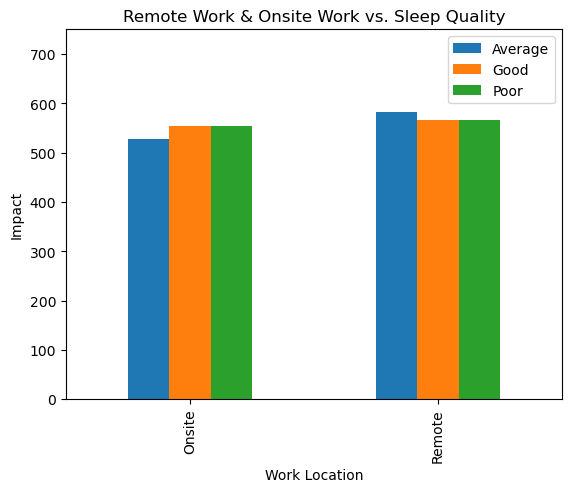

In [185]:
# Bar chart showing the impact of work location on sleep quality
sleep_grouped_data.plot(kind = 'bar')
plt.title('Remote Work & Onsite Work vs. Sleep Quality')
plt.xlabel('Work Location')
plt.ylabel('Impact')
plt.legend()
plt.ylim(0,750)
plt.show()

In [186]:
# Statistical Analysis for Sleep quality
remote_sleep_quality = [582, 566, 566]
onsite_sleep_quality = [528, 554, 555]

f_stat, p_value = stats.f_oneway(remote_sleep_quality, onsite_sleep_quality)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 6.182481751824817, P-value: 0.067740687216128


**Statistical Analysis:** Our hypothesis regarding the impact of remote work on sleep quality is that it contributes to improved sleep due to reduced stress related to daily commutes and work-related challenges. By eliminating these stressors, individuals may experience a greater sense of mental relaxation, leading to better overall sleep quality.

Based on our analysis of the dataset, we have found that there is no significant difference in sleep quality between remote and onsite workers. Interestingly, onsite workers tend to report slightly better sleep quality. One possible explanation is that the physical and mental demands of leaving home and interacting with others may help expend excess energy, promoting better rest. In contrast, remote workers may have more opportunities for rest throughout the day, including taking naps, which could result in difficulty falling asleep at night, potentially affecting their overall sleep quality.

## Section 6: Work Location Impact on Social Isolation by Region
### How does region and work location affect social isolation ratings?

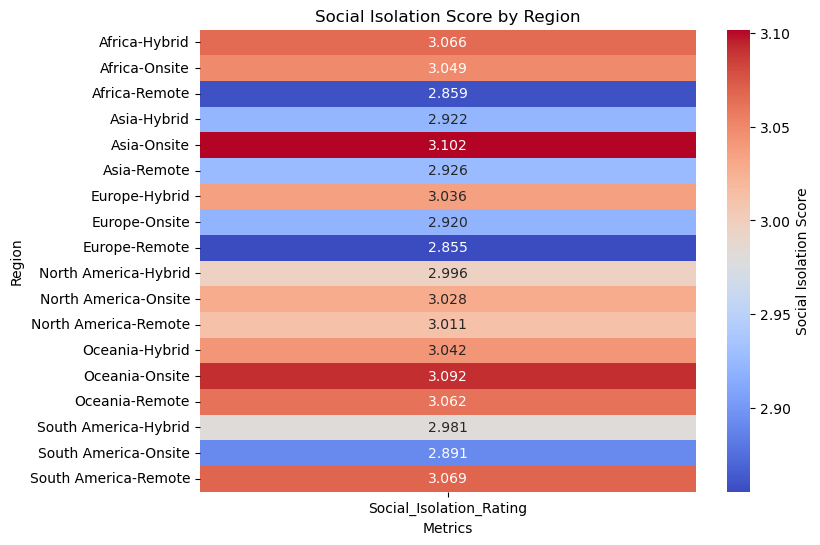

In [187]:
# Pivot the DataFrame to structure it for a heatmap
heatmap_data = mental_health_data_df.pivot_table(index=('Region','Work_Location'), values='Social_Isolation_Rating', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Social Isolation Score'})
plt.title('Social Isolation Score by Region')
plt.xlabel('Metrics')
plt.ylabel('Region')
plt.show()

**Analysis/Observations:** In the heatmap above, the darker red colors represent higher ratings of social isolation (more isolated) while the darker blue colors represent lower ratings of social isolation (less isolated). The two highest scores of social isolation occurred at onsite jobs in Asia and Oceania, while the two lowest scores of social isolation occurred at remote jobs in Europe and Africa. There are a lot of the confounding variables that may be contributing to these scores, such as differences is cultural and social norms, that may be affected the scores. Overall, there is not a lot of variability among the scores for social isolation between regions and work location.

In [188]:
# Summary Statistics
# Create a pivot chart to have a summary of means per work location to use as observed values
pivot_w = clean_data.pivot_table(columns='Work_Location', values='Social_Isolation_Rating', aggfunc='mean')
pivot_w

# Run a chi-squared test between remote, onsite, and hybrid
observed = pd.Series([2.961494, 3.012828, 3.00849], index=["Remote", "Onsite", "Hybrid"])
df_test = pd.DataFrame([observed]).T
df_test[1] = df_test[0].mean()
df_test.columns = ["observed", "expected"]
df_test
stats.chisquare(df_test['observed'], df_test['expected'])

Power_divergenceResult(statistic=0.0005413251235804531, pvalue=0.9997293740640165)

**Statistical Analysis:** Since the p-value for the chi-square test was high (0.999), we can conclude that there is no statistical difference between the observed mean social isolation ratings and the expected social isolation ratings.

## Section 7: Final Thoughts and Conclusions

**Final Thoughts and Implications:**

Based on the thorough analysis involving work locations and various aspects of mental health and lifestyles, we can conclude that, for the most part, there are no correlations between work locations and the presence of mental health issues. There are a lot of other external factors that can influence mental health/lifestyle problems outside of work location, such as previous histories or instances mental health/lifestyle issues, other related health conditions, and other social/cultural external factors. Global remote work is also a concept that is fairly new and is something that will continue to grow in the coming years. We also may not have seen many correlations and trends due to the relatively small size of the sample from the dataset when considering the global scale and the recency of which the dataset was published (about 2 months ago).

With mental health becoming a larger topic over the past couple of years, we believe that further studies should be done to further test the effects of working remotely on mental health. Larger sample sizes over a diverse global population may lead to better results in the future. With remote work becoming more prevelant for many companies and roles, a clearer understanding of its potential effects on mental health and lifestyles can serve as a good way for companies to invest in providing solutions for any negative impacts work location may have.